# What is the relationship between the Gross Domestic Product and the performance of their national soccer teams in international matches?

## Introduction

- Find bias
- Regression, based on country's GDP and performance
- Datasets from IMF and RSSSF

Soccer is the most popular sport in the world, with millions of fans every year watching their country battle it out for victory. The simple yet competitive premise of the sport has allowed it to spread across almost every country in the world, from the poorest corners of the globe to the richest. That has led many to wonder if richer countries have the upper hand in the sport, so we want to find out if a country’s GDP Per Capita (Gross Domestic Product Per Capita) affects its national soccer team’s performance. 

To answer this, we will be taking a GDP data set from the International Monetary Fund and a national soccer data set for the Rec.Sport.Soccer Statistics Foundation and merging them together to find a connection between the two. Our World In Data is also used to find the continent of each country.

### Data Sources

- https://www.imf.org/external/datamapper/datasets/WEO
- https://www.rsssf.org/tablesw/wcq-records.html
- https://ourworldindata.org/grapher/continents-according-to-our-world-in-data

In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
library(rvest)
library(stringr)
options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

### International Monetary Fund (Gross Domestic Product Per Capita)

The dataset contains the country and columns of years from 1980 to 2027. Each column contains data of the GDP Per Capita in US Dollars.

In [2]:
# Loading all data needed for this project

# Loading IMF data for country GDPs from 1980 to 2027
country_gdp_capita <- read_csv("data/Country_GDP_Capita_IMF.csv", show_col_types = FALSE)
country_gdp_capita

Country,1980,1981,1982,1983,1984,1985,1986,1987,1988,⋯,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,582.323,586.204,611.268,NA,NA,NA,NA,NA,NA,NA
Albania,728.359,817.734,824.542,815.529,788.332,788.801,855.724,832.245,805.046,⋯,5257.714,5345.058,5268.239,6373.300,6369.009,6591.682,6968.694,7470.082,7958.016,8469.507
Algeria,2268.607,2305.505,2254.328,2316.679,2432.717,2753.697,2698.915,2705.111,2143.742,⋯,4118.839,3953.576,3304.865,3659.531,4151.437,4162.176,4242.401,4371.569,4523.644,4637.342
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Other advanced economies,6886.485,6930.571,6792.923,6699.744,6948.341,6861.781,8292.104,10106.092,11787.179,⋯,44142.030,43022.850,42555.028,48965.722,49580.11,51398.605,53529.015,55708.932,57993.545,60331.76
Sub-Saharan Africa,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,1760.388,1727.391,1591.065,1746.345,1849.62,1933.069,2043.649,2160.323,2287.835,2421.53
World,2862.333,2876.220,2772.215,2797.085,2846.673,2920.230,3376.821,3820.734,4222.994,⋯,11489.302,11558.645,11155.514,12616.281,13396.10,13923.716,14522.871,15149.837,15810.007,16490.80


### International Monetary Fund (Gross Domestic Product Growth Per Year)

The dataset contains the country and columns of years from 1980 to 2027. Each column contains data of the percent annual change of GDP from the previous year, which could also be applied to GDP Per Capita

In [3]:
# Loading IMF data for country GDP Growth from 1980 to 2027
country_gdp_growth <- read_csv("data/Country_GDP_Growth_IMF.csv", show_col_types = FALSE)
country_gdp_growth

Country,1980,1981,1982,1983,1984,1985,1986,1987,1988,⋯,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,1.2,3.9,-2.4,NA,NA,NA,NA,NA,NA,NA
Albania,2.7,5.7,2.9,1.1,2.0,-1.5,5.6,-0.8,-1.4,⋯,4.0,2.1,-3.5,8.5,4.0,2.5,3.2,3.2,3.4,3.4
Algeria,-5.4,3.0,6.4,5.4,5.6,5.6,-0.2,-0.7,-1.9,⋯,1.2,1.0,-5.1,3.5,4.7,2.6,2.0,1.9,1.9,1.7
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Other advanced economies,3.8,4.2,2.2,4.0,6.6,4.3,5.5,6.5,5.5,⋯,2.8,2.0,-1.7,5.3,2.8,2.3,2.6,2.3,2.3,2.2
Sub-Saharan Africa,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,3.3,3.2,-1.6,4.7,3.6,3.7,4.1,4.2,4.3,4.4
World,2.1,2.0,0.7,2.7,4.6,3.7,3.6,3.9,4.7,⋯,3.6,2.8,-3.0,6.0,3.2,2.7,3.2,3.4,3.3,3.2


### Continents and Countries

We are using this dataset to pair a country with its continent. The IMF does not provide the continent with the dataset. This will help our data when we are seperating our soccer data based on continents. 

In [4]:
continents <- read_csv("data/continents-according-to-our-world-in-data.csv", show_col_types = FALSE) |> select(Entity, Continent)
continents

Entity,Continent
<chr>,<chr>
Abkhazia,Asia
Afghanistan,Asia
Akrotiri and Dhekelia,Asia
⋮,⋮
Zanzibar,Africa
Zimbabwe,Africa
Åland Islands,Europe


### World Championship (Final Tournaments + Qualifying) All-time-table 1930-2014 (20 tournaments)

The following dataset looks at all the matches played during the FIFA World Cup and determines the statistics of every soccer team as if it was a league table. 

This is the main data used in our training which will contain all the past international matches each country has played, which includes both qualifying and tournament matches.

The testing data could use the most recent data from FIFA World Cup Tournament Matches, which is contained in SoccerDataWorldCupTournament.csv

Columns:
- WC1: number of world championships played 
- WC2: uninterrupted participation in the last world cups (+) 
     World cups missed since last participation (-)
- FT:  Final tournaments reached
- QS:  missed qualification for final tournament
- FT1: Number of final tournaments played 
- FT2: Consecutive final tournaments played (+) consecutive final tournaments missed (-)
- G:   Games
- W:   Wins
- D:   Draws
- L:   Loses
- G+:  Number of Goals scored
- G-:  Number of Goals Scored Against
- GD:  goal difference (G+) - (G-)
- P2+: points according to 2 points/win
- P%:  success percentage (=(Wins+Draw/2)/G)
- P+:  points actually obtained
- P3+: points according to 3 points/win

In [5]:
# Loading training soccer_data from World Cup data of all time from 1930 - 2020
soccer_data <- read_csv("data/SoccerDataWorldCupALL.csv", show_col_types = FALSE)
soccer_data

Country,WC1,WC2,FT,QS,G,W,D,L,G+,G-,GD,P2+,P%,P+,P3+
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
Germany,18,16,18,0,190,130,38,22,473,187,286,298:82,0.784,354,428
Brazil,20,20,20,0,196,127,41,28,420,161,259,295:97,0.753,349,422
Mexico,18,6,15,3,212,116,47,49,462,208,254,279:145,0.658,340,395
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Montserrat,4,4,0,4,7,0,0,7,5,41,-36,0:14,0,0,0
North Yemen,2,-6,0,2,8,0,0,8,1,17,-16,0:16,0,0,0
Brunei,2,-3,0,2,12,0,0,12,2,57,-55,0:24,0,0,0


In [6]:
# Loading testing soccer_data from World Cup tournament data of all time from 1930 - 2020
testing_soccer_data <- read_csv("data/SoccerDataWorldCupTournament.csv", show_col_types = FALSE)
testing_soccer_data

Team,FT1,FT2,G,W,D,L,G+,G-,GD,P2+,P%,P+,P3+
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
Brazil,20,20,104,71,16,17,221,102,119,158:50:00,0.760,185,229
Germany,18,16,106,66,20,20,224,121,103,152:60,0.717,179,218
Italy,18,14,83,45,20,18,128,77,51,110:56:00,0.663,124,155
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Haiti,1,-10,3,0,0,3,2,14,-12,0:06,0,0,0
Zaire,1,-10,3,0,0,3,0,14,-14,0:06,0,0,0
El Salvador,2,-8,6,0,0,6,1,22,-21,0:12,0,0,0


## Preliminary exploratory data analysis

The first thing that we noticed about the IMF database was that it was untidy. There were multiple observations spanning the columns and not all variables shared the same column. In order to tidy the data, it is now organized into Country, Year, GDP_Capita/GDP_Growth from pivot_longer. This organization will also help combining the data with the soccer data and allow us to find the mean of the GDP from 1930 to 2027.

The wrangling that follows will combine the GDP Per Capita, GDP Growth, Soccer Statistics(G+, G-, GD, P%, P+, P3+), and Continent, which contain important predictor variables for our regression/classification.

In [7]:
# Tidy country_gdp_capita data by pivoting it longer
country_capita_longer <- country_gdp_capita |>
    pivot_longer(cols = -Country,
                names_to = "Year",
                values_to = "GDP_Capita",
                values_drop_na = TRUE) |>
    mutate(Year = as.numeric(Year))
country_capita_longer

Country,Year,GDP_Capita
<chr>,<dbl>,<dbl>
Afghanistan,2002,233.433
Afghanistan,2003,233.755
Afghanistan,2004,254.259
⋮,⋮,⋮
World,2025,15149.84
World,2026,15810.01
World,2027,16490.80


In [8]:
# Tidy country_gdp_capita data by pivoting it longer
country_growth_longer <- country_gdp_growth |>
        pivot_longer(cols = -Country,
                names_to = "Year",
                values_to = "GDP_Growth",
                values_drop_na = TRUE) |>
    mutate(Year = as.numeric(Year))
country_growth_longer

Country,Year,GDP_Growth
<chr>,<dbl>,<dbl>
Afghanistan,2003,8.7
Afghanistan,2004,0.7
Afghanistan,2005,11.8
⋮,⋮,⋮
World,2025,3.4
World,2026,3.3
World,2027,3.2


In [9]:
# Combine GDP capita data and GDP Growth

country_gdp_data <- left_join(country_capita_longer, country_growth_longer, by = c("Country", "Year"), copy = FALSE, na_matches = "na")
country_gdp_data

Country,Year,GDP_Capita,GDP_Growth
<chr>,<dbl>,<dbl>,<dbl>
Afghanistan,2002,233.433,NA
Afghanistan,2003,233.755,8.7
Afghanistan,2004,254.259,0.7
⋮,⋮,⋮,⋮
World,2025,15149.84,3.4
World,2026,15810.01,3.3
World,2027,16490.80,3.2


In [10]:
# Find the mean gdp for each country, which is useful for predicting the relationship between GDP and soccer performance
country_mean_gdp_capita <- country_gdp_data |>
    group_by(Country) |>
    summarize(Mean_GDP_Capita = mean(GDP_Capita))

country_mean_gdp_growth <- country_gdp_data |>
    group_by(Country) |>
    summarize(Mean_GDP_Growth = mean(GDP_Growth, na.rm = TRUE))

#Combining the mean gdp per capita, gdp growth, and continent

country_mean_data <- left_join(country_mean_gdp_capita, country_mean_gdp_growth, by = "Country", copy = FALSE, na_matches = "na") |>
    left_join(continents, by = c("Country" = "Entity"), copy = FALSE, na_matches = "na")
country_mean_data

Country,Mean_GDP_Capita,Mean_GDP_Growth,Continent
<chr>,<dbl>,<dbl>,<chr>
Advanced economies,34047.0894,2.256250,NA
Afghanistan,528.8195,6.122222,Asia
Africa (Region),1658.5872,3.824324,NA
⋮,⋮,⋮,⋮
Yemen,974.7587,2.0027027,Asia
Zambia,894.8820,3.4104167,Africa
Zimbabwe,1284.9607,0.7310345,Africa


In [11]:
# Attempt to combine world cup data with Country, GDP Per Capita, and GDP Growth

soccer_data_organized <- soccer_data |>
    select(Country, `G+`, `G-`, `GD` ,`P+`, `P%`, `P3+`)

soccer_data_organized

soccer_data_combined <- country_mean_data |>
    inner_join(soccer_data_organized, by = "Country", copy = FALSE, na_matches = "na")
    
soccer_data_combined

Country,G+,G-,GD,P+,P%,P3+
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Germany,473,187,286,354,0.784,428
Brazil,420,161,259,349,0.753,422
Mexico,462,208,254,340,0.658,395
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Montserrat,5,41,-36,0,0,0
North Yemen,1,17,-16,0,0,0
Brunei,2,57,-55,0,0,0


Country,Mean_GDP_Capita,Mean_GDP_Growth,Continent,G+,G-,GD,P+,P%,P3+
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,528.8195,6.122222,Asia,2,21,-19,1,0.083,1
Albania,2945.3290,2.879167,Europe,62,175,-113,51,0.218,55
Algeria,3145.9694,2.435417,Africa,124,98,26,128,0.564,147
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Vietnam,1719.1693,6.329167,Asia,35,68,-33,25,0.281,26
Yemen,974.7587,2.002703,Asia,46,45,1,37,0.469,40
Zambia,894.8820,3.410417,Africa,134,81,53,121,0.568,141


## Visualizing GDP and Multiple World Cup Stats

We will be comparing the GDP and All Time World Cup statistics to determine the relationships developed between the two. We will also be classifying each point by their continent as we believe that it has a major influence on the GDP disparity.

The three graphs that will be looked at will be compared the Points Per 3 Wins and the Success Percentage. Points Per 3 Wins are good at predicting how successful a national team is within there own continent and is one of the methods used in many sports leagues. Success Percentage determines if the team is successful from continental to international matches.

Since P3+ and P% is similar, we will also be comparing them to GDP Growth to see if a relationship could be established.

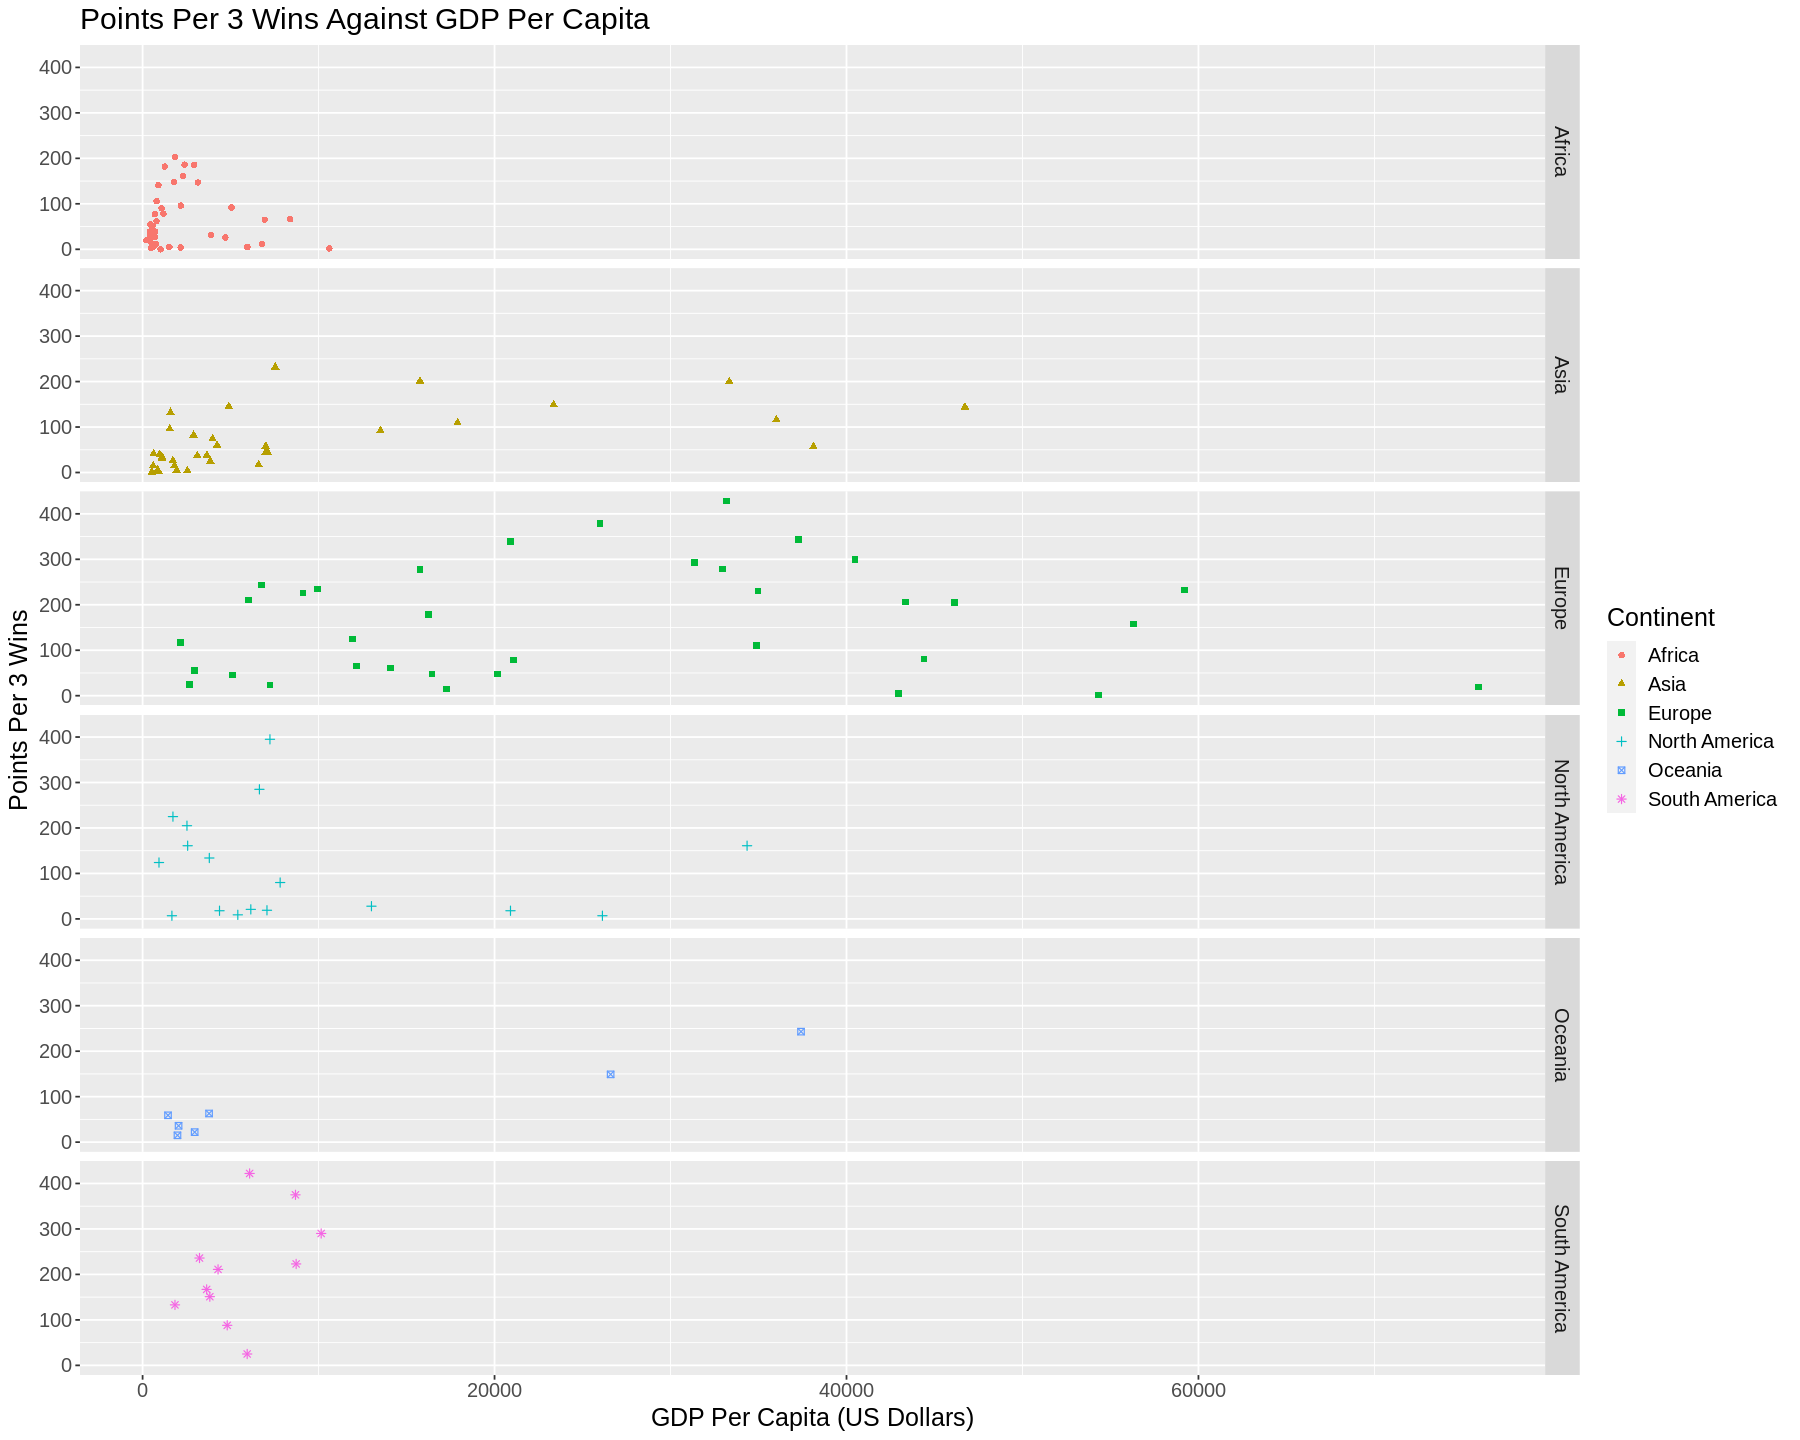

In [12]:
# Visualizing GDP and multiple world cup stats
# GDP Per Capita with Points Per 3 Games

options(repr.plot.width = 15, repr.plot.height = 12)


gdp_p3_plot <- ggplot(soccer_data_combined, aes(x = Mean_GDP_Capita, y = `P3+`, color = Continent, shape = Continent)) + 
    geom_point() +
    labs(x = "GDP Per Capita (US Dollars)", y = "Points Per 3 Wins") +
    ggtitle("Points Per 3 Wins Against GDP Per Capita") +
    theme(text = element_text(size = 15)) +
    facet_grid(rows = vars(Continent))

gdp_p3_plot

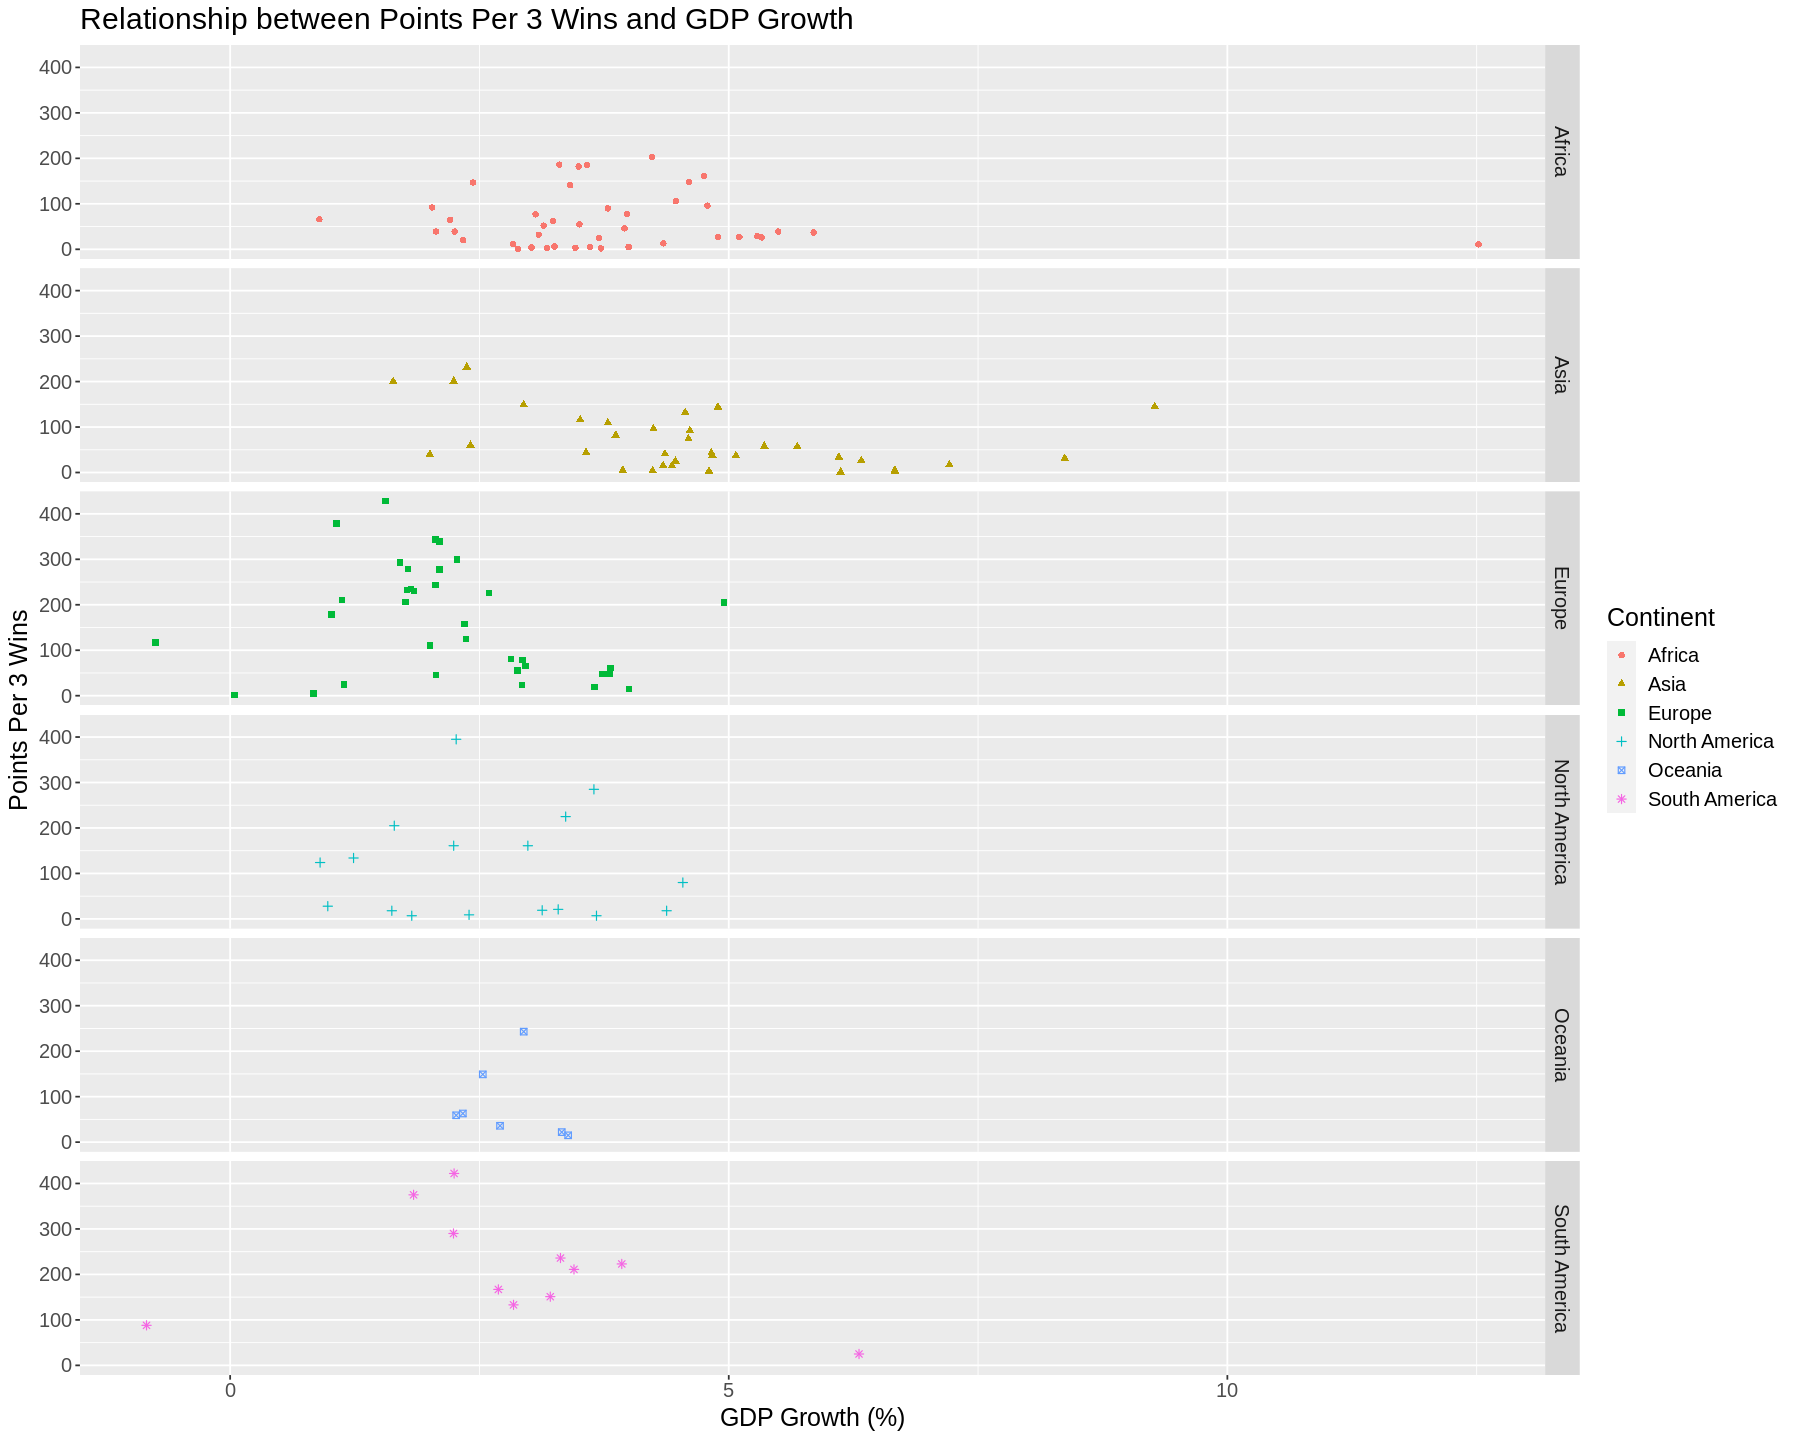

In [13]:
# GDP Growth with Points Per 3 Games

gdp_growth_plot <- ggplot(soccer_data_combined, aes(x = Mean_GDP_Growth, y = `P3+`, color = Continent, shape = Continent)) + 
    geom_point() +
    labs(x = "GDP Growth (%)", y = "Points Per 3 Wins") +
    ggtitle("Relationship between Points Per 3 Wins and GDP Growth") +
    theme(text = element_text(size = 15)) +
    facet_grid(rows = vars(Continent))

gdp_growth_plot

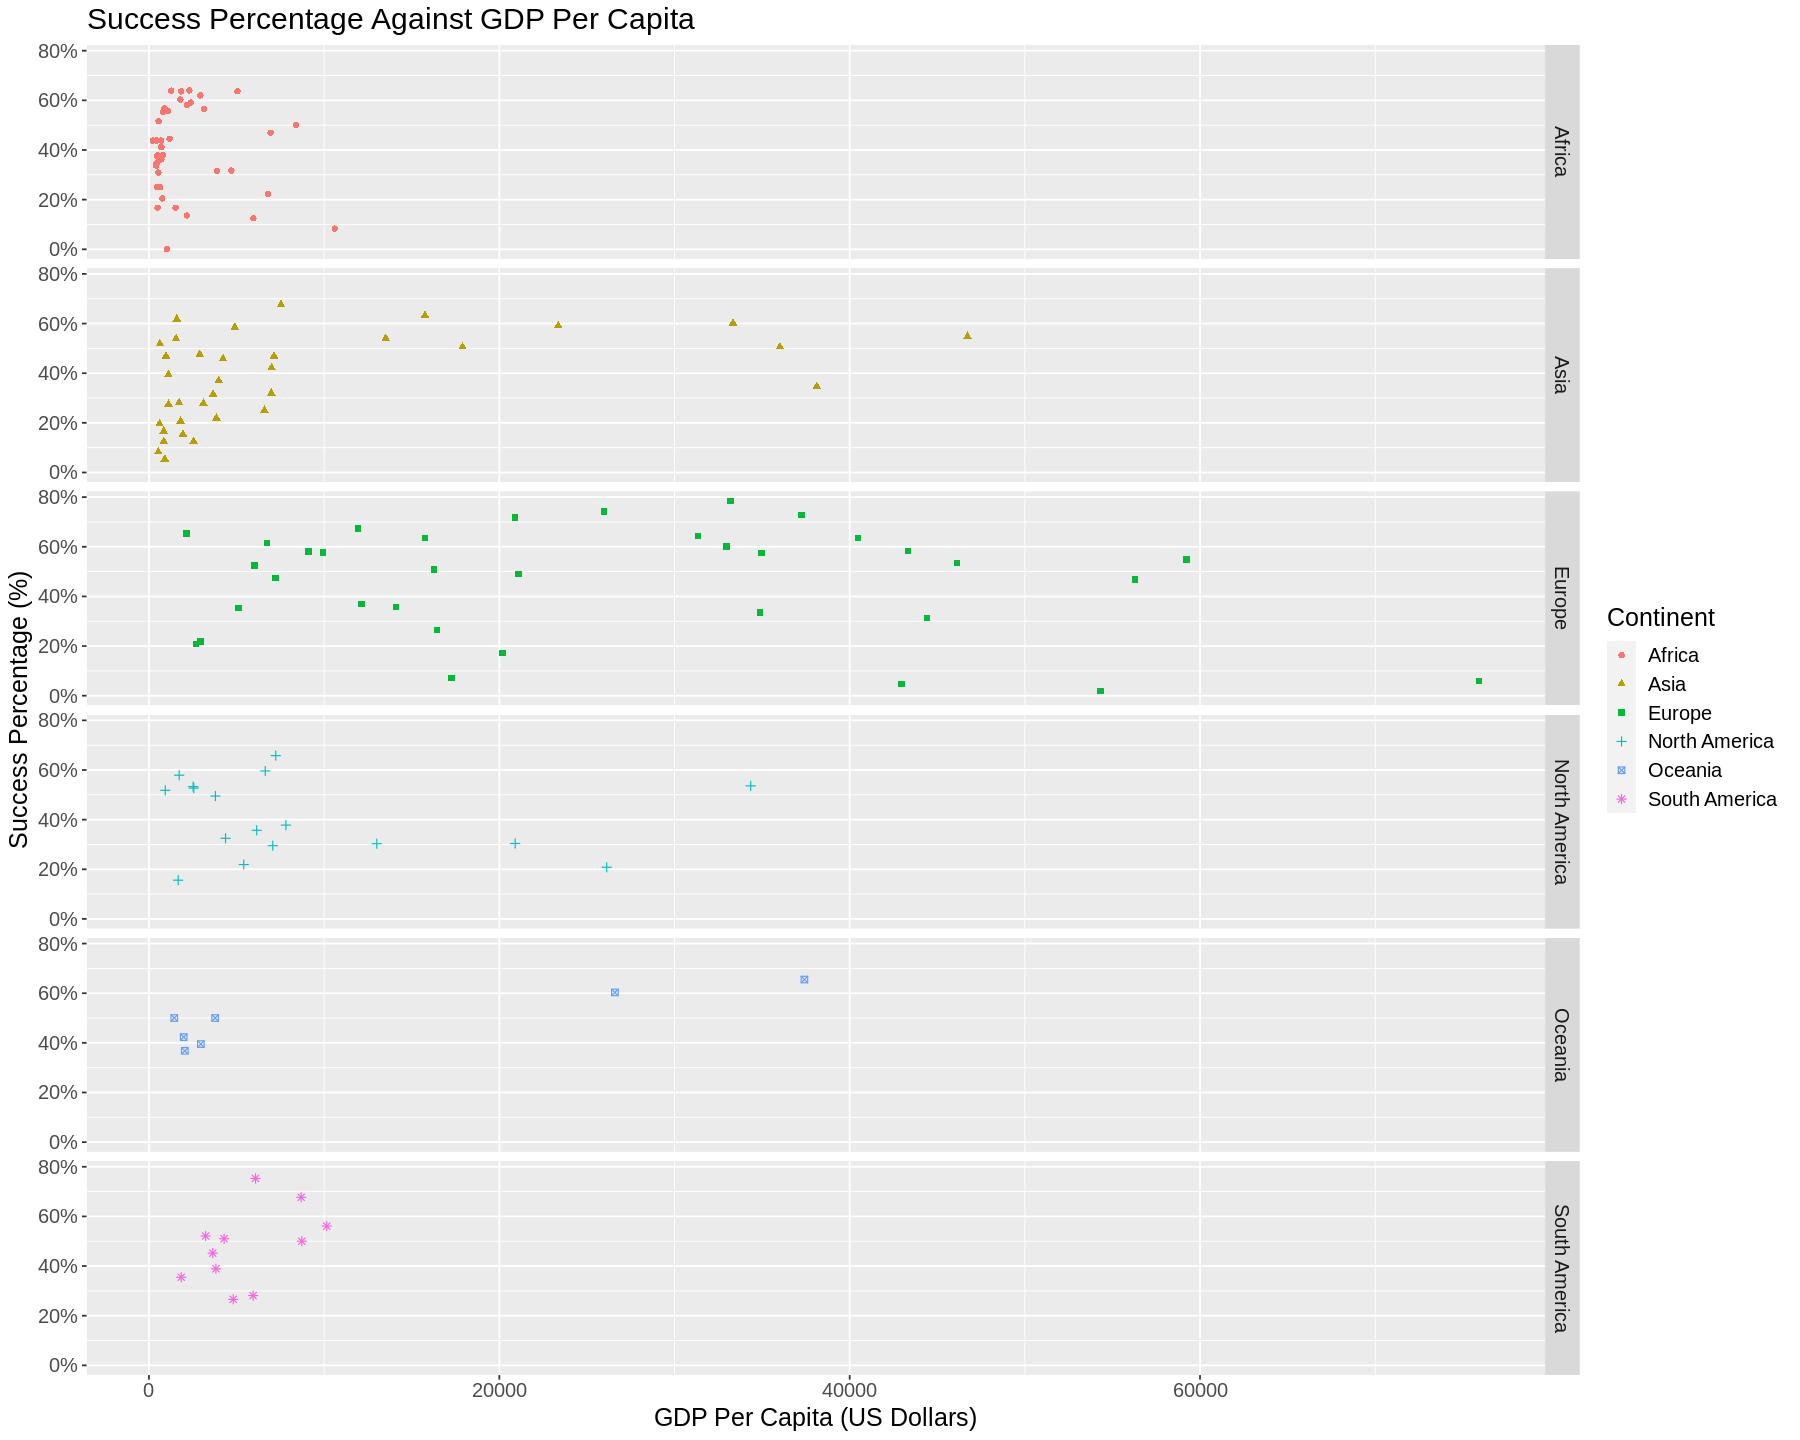

In [15]:
# GDP Per Capita with Success Percentage

gdp_percent_plot <- ggplot(soccer_data_combined, aes(x = Mean_GDP_Capita, y = `P%`, color = Continent, shape = Continent)) + 
    geom_point() +
    labs(x = "GDP Per Capita (US Dollars)", y = "Success Percentage (%)") +
    ggtitle("Success Percentage Against GDP Per Capita") +
    theme(text = element_text(size = 15)) +
    facet_grid(rows = vars(Continent)) +
    scale_y_continuous(labels=percent)

gdp_percent_plot

## Methods

We will assign a single value to represent the ratio of their collective wins, draws, and losses. Combining these categories together allows us to find the most successful soccer team quickly and objectively. We filter the soccer dataset to include the 147 best performing countries (based on the ratio we had devised) and filter the GDP of those 147 countries in our GDP dataset. We can split this data into a training and testing set and use regression to the training set. Using a scatter plot, we will compare the GDP (on the x-axis) to the soccer success percentage(on the y-axis), where each plot represents a country. We will separate this data again to focus on two of the most successful soccer continents: Europe and South America. We will filter the countries in our original sample (best performing 147 countries) that do not belong to Europe or South America.

This gives a dataset of countries belonging to the continents we want, and we’ll split this again by filtering for South American countries and then for European countries. For both continent datasets, we will create a training and testing set, plotting their training data as scatter plots and using regression.


## Expected outcomes and significance

We expect our findings for the top 147 countries to show little/no relationship between the two variables. Since there will be several countries that are successful despite having a relatively low GDP, our graph will show an extremely general relationship. 
We think that our continent-specific plots will show a stronger relationship. By narrowing the sample down to a continental scale, we anticipate the relationship to be more accurate. This is because the disparities in GDP and success levels on a global scale cannot truly reflect the correlation. The continent data would give more precise results since the average GDP is extremely different for each.
From this project, we can try to figure out if bias in the global soccer world is real and if richer countries really do have an advantage in the sport. If we see that GDP generally has a weak relationship with success, then we can consider other factors that play a role (physical stature, climate, etc). If poorer countries are shown to be generally the same as (or better than) richer countries, we can ask how this is possible considering that poorer countries may not have as many resources as their richer counterparts.